In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('cruise_ship_info.csv')

In [4]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [6]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [8]:
df.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


# Seems the columns of interest has to the crew column are: Tonnage, Passengers, length,cabins

In [9]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [10]:
df2=df[['Tonnage', 'passengers', 'length','cabins','crew']]

In [11]:
df2

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,0.59
154,76.800,19.60,8.79,9.67,12.00
155,5.350,1.58,4.40,0.74,0.88
156,5.350,1.67,4.40,0.74,0.88


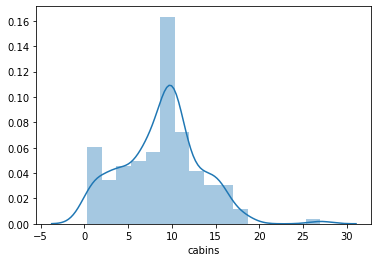

In [15]:
sns.distplot(df2['cabins'])

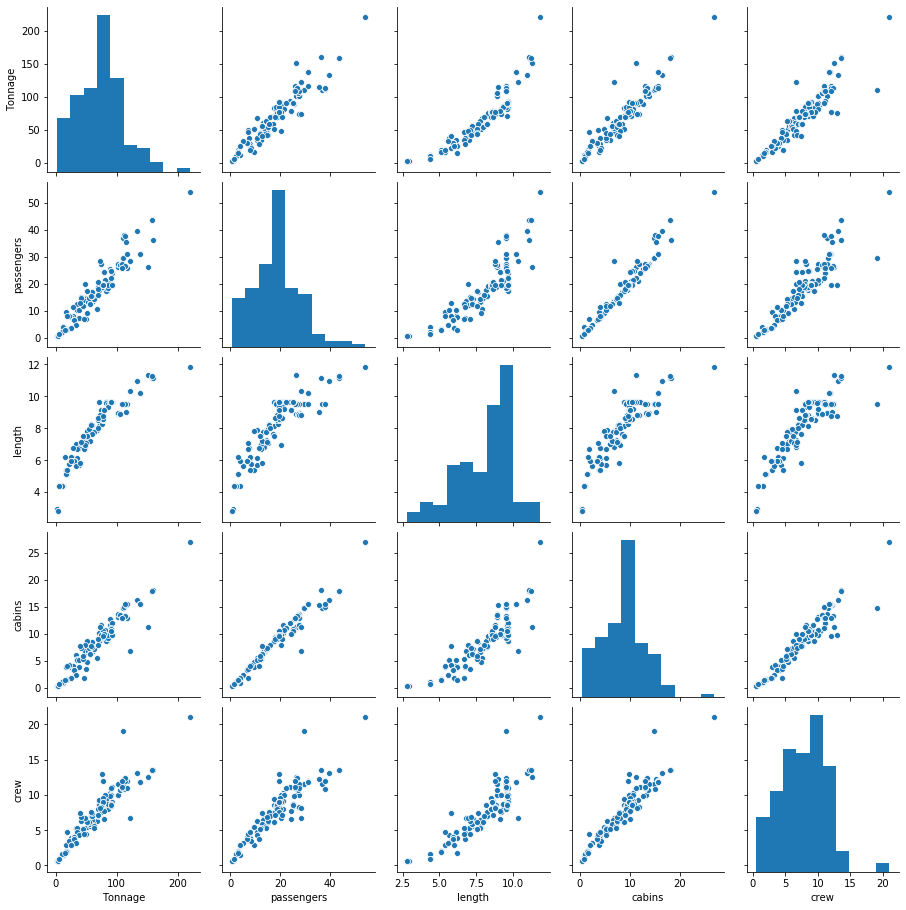

In [16]:
sns.pairplot(df2)

In [62]:
X=pd.DataFrame(df2[['Tonnage', 'passengers', 'length','cabins']])
y=pd.DataFrame(df2['crew'])

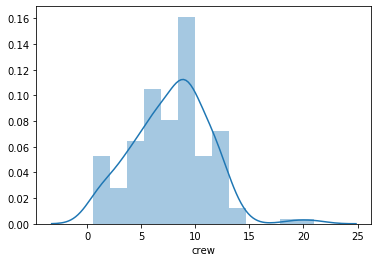

In [63]:
sns.distplot(df2['crew'])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr=LinearRegression()

In [68]:
type(X)

pandas.core.frame.DataFrame

In [69]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print(lr.intercept_)

[-0.5351708]


In [83]:
coef=lr.coef_
coef=coef.reshape(4,1)

In [84]:
coeff_df = pd.DataFrame(coef,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Tonnage,0.009268
passengers,-0.172828
length,0.343327
cabins,0.916947


## One unit increase of Tonnage is equal to 0.009268 increase in crew, the same for the coefficients of passengers, length and cabins

In [71]:
pred=lr.predict(X_test)

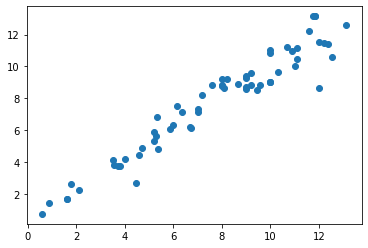

In [85]:
plt.scatter(y_test,pred)

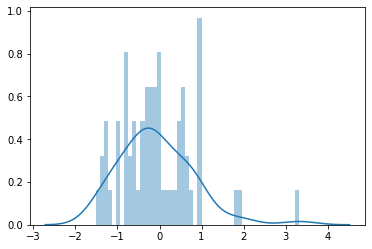

In [87]:
sns.distplot((y_test-pred),bins=50)

In [88]:
from sklearn import metrics

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.6774411041870964
MSE: 0.768039134660526
RMSE: 0.876378419782531
